In [1]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import parallel_backend
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, FunctionTransformer, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
from sklearn.svm import SVR


In [2]:
Ames = pd.read_csv('Ames_HousePrice.csv', index_col=0)


In [3]:
# Dataset shape
print(Ames.shape)
rows, columns = Ames.shape
print(f"The dataset comprises {rows} properties described across {columns} attributes.")
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(Ames.head())


(2580, 81)
The dataset comprises 2580 properties described across 81 attributes.
First few rows of the dataset:
         PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  LotArea  \
1  909176150        856     126000          30       RL          NaN     7890   
2  905476230       1049     139500         120       RL         42.0     4235   
3  911128020       1001     124900          30  C (all)         60.0     6060   
4  535377150       1039     114000          70       RL         80.0     8146   
5  534177230       1665     227000          60       RL         70.0     8400   

  Street Alley LotShape  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
1   Pave   NaN      Reg  ...         166        0    NaN   NaN         NaN   
2   Pave   NaN      Reg  ...           0        0    NaN   NaN         NaN   
3   Pave   NaN      Reg  ...           0        0    NaN   NaN         NaN   
4   Pave   NaN      Reg  ...         111        0    NaN   NaN         NaN   
5   Pave   

In [4]:
# Determine the data type for each feature
data_types = Ames.dtypes
# Tally the total by data type
type_counts = data_types.value_counts()
print(type_counts)


object     43
int64      27
float64    11
Name: count, dtype: int64


In [5]:
# Determine the data type for each feature
data_types = Ames.dtypes
# View a few datatypes from the dataset (first and last 5 features)
print(data_types)


PID               int64
GrLivArea         int64
SalePrice         int64
MSSubClass        int64
MSZoning         object
                  ...  
MiscVal           int64
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
Length: 81, dtype: object


In [6]:
# Check the structure of the dataset
print("\nStructure of the dataset:")
print(Ames.info())



Structure of the dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 2580 entries, 1 to 763
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2580 non-null   int64  
 1   GrLivArea      2580 non-null   int64  
 2   SalePrice      2580 non-null   int64  
 3   MSSubClass     2580 non-null   int64  
 4   MSZoning       2580 non-null   object 
 5   LotFrontage    2118 non-null   float64
 6   LotArea        2580 non-null   int64  
 7   Street         2580 non-null   object 
 8   Alley          168 non-null    object 
 9   LotShape       2580 non-null   object 
 10  LandContour    2580 non-null   object 
 11  Utilities      2580 non-null   object 
 12  LotConfig      2580 non-null   object 
 13  LandSlope      2580 non-null   object 
 14  Neighborhood   2580 non-null   object 
 15  Condition1     2580 non-null   object 
 16  Condition2     2580 non-null   object 
 17  BldgType       2580 non-null   

In [7]:
# Calculating the percentage of missing values for each column
missing_data = Ames.isnull().sum()
missing_percentage = (missing_data / len(Ames)) * 100
# Combining the counts and percentages into a DataFrame for better visualization
missing_info = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
# Sorting the DataFrame by the percentage of missing values in descending order
missing_info = missing_info.sort_values(by='Percentage', ascending=False)
# Display columns with missing values
print(missing_info[missing_info['Missing Values'] > 0])


              Missing Values  Percentage
PoolQC                  2571   99.651163
MiscFeature             2483   96.240310
Alley                   2412   93.488372
Fence                   2055   79.651163
MasVnrType              1573   60.968992
FireplaceQu             1241   48.100775
LotFrontage              462   17.906977
GarageQual               129    5.000000
GarageFinish             129    5.000000
GarageYrBlt              129    5.000000
GarageCond               129    5.000000
GarageType               127    4.922481
BsmtExposure              71    2.751938
BsmtFinType2              70    2.713178
BsmtCond                  69    2.674419
BsmtQual                  69    2.674419
BsmtFinType1              69    2.674419
MasVnrArea                14    0.542636
BsmtHalfBath               2    0.077519
BsmtFullBath               2    0.077519
GarageArea                 1    0.038760
GarageCars                 1    0.038760
Electrical                 1    0.038760
BsmtUnfSF       

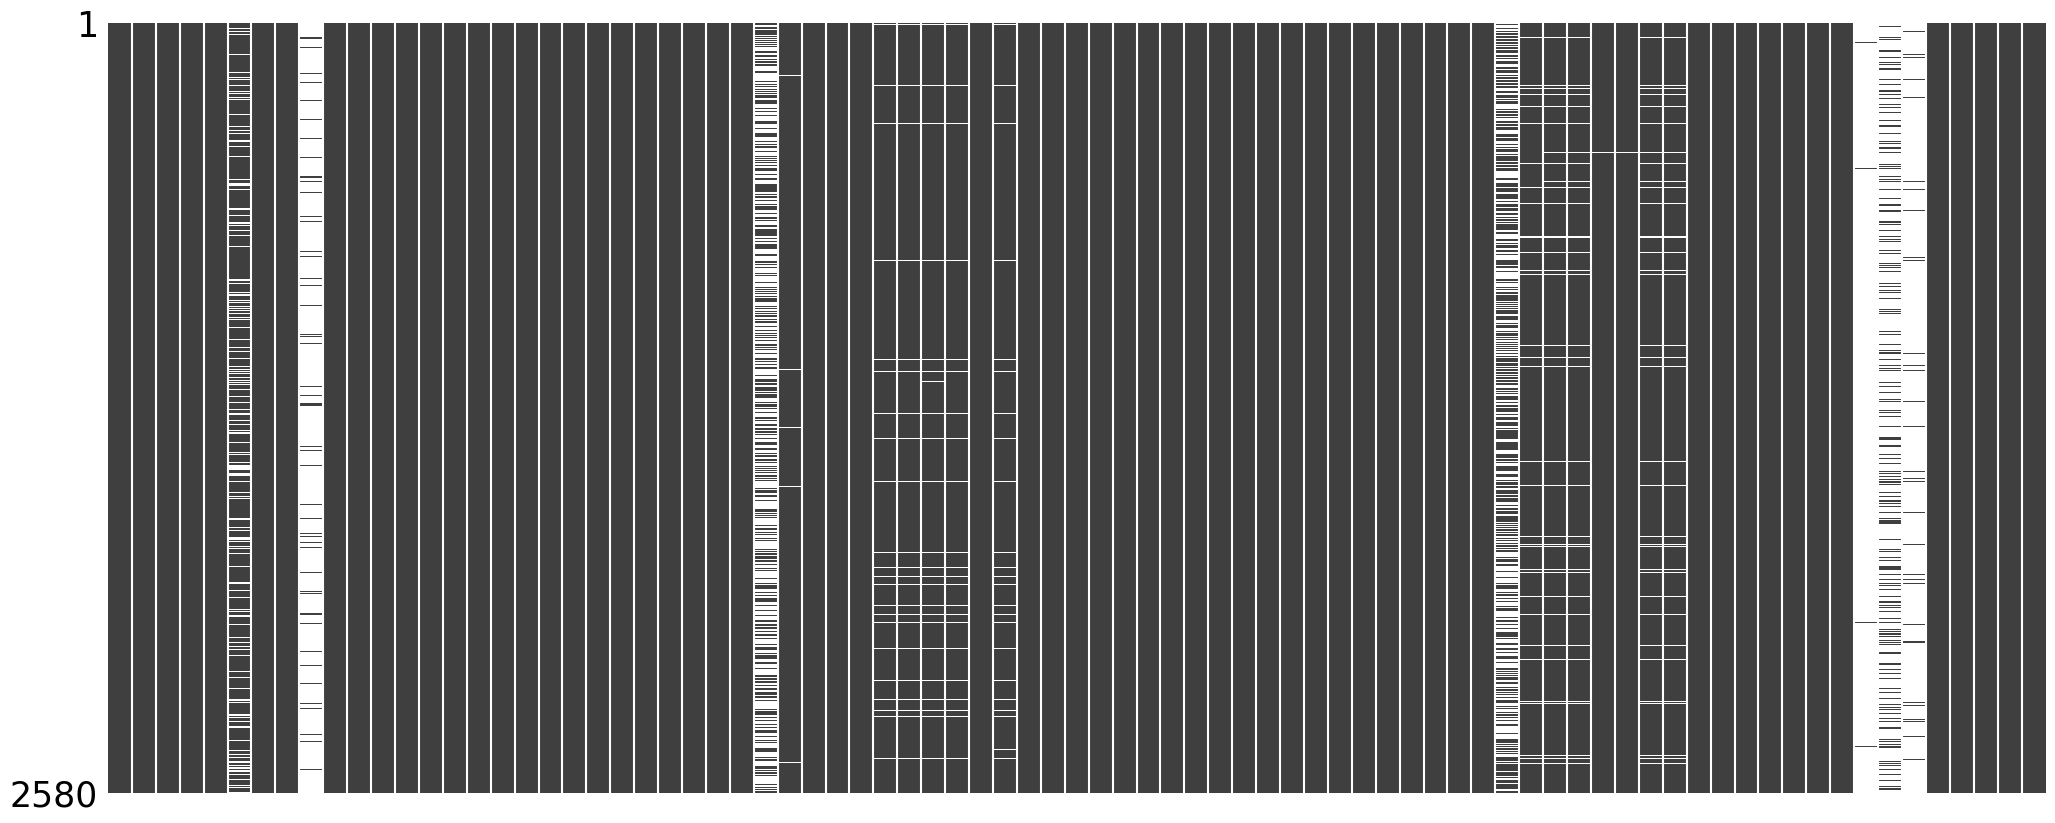

In [8]:
msno.matrix(Ames, sparkline=False, fontsize=20)
plt.show()


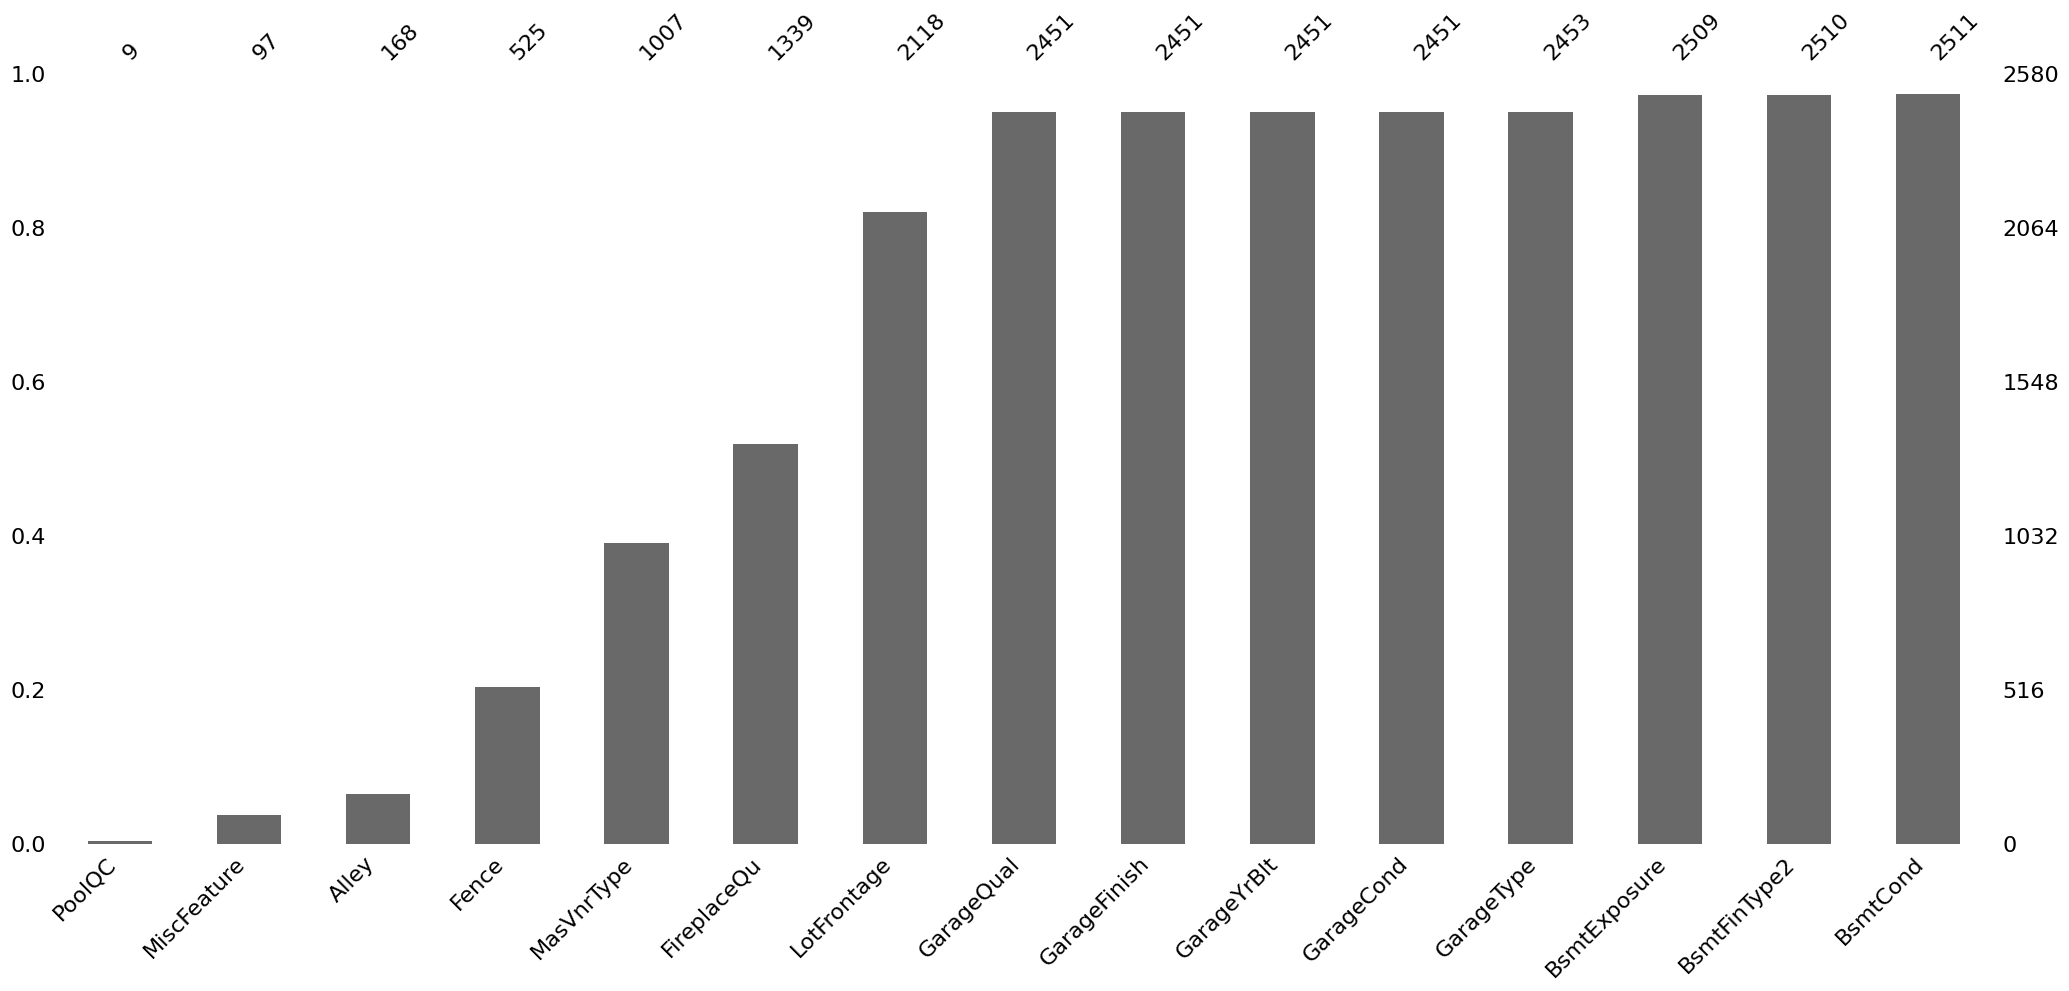

In [9]:
# Calculating the percentage of missing values for each column
missing_data = Ames.isnull().sum()
missing_percentage = (missing_data / len(Ames)) * 100
# Combining the counts and percentages into a DataFrame for better visualization
missing_info = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
# Sort the DataFrame columns by the percentage of missing values
sorted_df = Ames[missing_info.sort_values(by='Percentage', ascending=False).index]
# Select the top 15 columns with the most missing values
top_15_missing = sorted_df.iloc[:, :15]
#Visual with missingno
msno.bar(top_15_missing)
plt.show()


In [ ]:
# Filter to show only the top 15 columns with the most missing values
top_15_missing_info = missing_info.nlargest(15, 'Percentage')
# Create the horizontal bar plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Percentage', y=top_15_missing_info.index, data=top_15_missing_info, orient='h')
plt.title('Top 15 Features with Missing Percentages', fontsize=20)
plt.xlabel('Percentage of Missing Values', fontsize=16)
plt.ylabel('Features', fontsize=16)
plt.yticks(fontsize=11)
plt.show()


In [10]:
# Convert the below numeric features to categorical features
Ames['MSSubClass'] = Ames['MSSubClass'].astype('object')
Ames['YrSold'] = Ames['YrSold'].astype('object')
Ames['MoSold'] = Ames['MoSold'].astype('object')


In [11]:
# Exclude 'PID' and 'SalePrice' from features and specifically handle the 'Electrical' column
numeric_features = Ames.select_dtypes(include=['int64', 'float64']).drop(columns=['PID', 'SalePrice']).columns
categorical_features = Ames.select_dtypes(include=['object']).columns.difference(['Electrical'])
electrical_feature = ['Electrical']


In [12]:
# Manually specify the categories for ordinal encoding according to the data dictionary
ordinal_order = {
    'Electrical': ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'],  # Electrical system
    'LotShape': ['IR3', 'IR2', 'IR1', 'Reg'],  # General shape of property
    'Utilities': ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'],  # Type of utilities available
    'LandSlope': ['Sev', 'Mod', 'Gtl'],  # Slope of property
    'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Evaluates the quality of the material on the exterior
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Evaluates the present condition of the material on the exterior
    'BsmtQual': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Height of the basement
    'BsmtCond': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # General condition of the basement
    'BsmtExposure': ['None', 'No', 'Mn', 'Av', 'Gd'],  # Walkout or garden level basement walls
    'BsmtFinType1': ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # Quality of basement finished area
    'BsmtFinType2': ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # Quality of second basement finished area
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Heating quality and condition
    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Kitchen quality
    'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],  # Home functionality
    'FireplaceQu': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Fireplace quality
    'GarageFinish': ['None', 'Unf', 'RFn', 'Fin'],  # Interior finish of the garage
    'GarageQual': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Garage quality
    'GarageCond': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Garage condition
    'PavedDrive': ['N', 'P', 'Y'],  # Paved driveway
    'PoolQC': ['None', 'Fa', 'TA', 'Gd', 'Ex'],  # Pool quality
    'Fence': ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']  # Fence quality
}


In [13]:
# Extract list of ALL ordinal features from dictionary
ordinal_features = list(ordinal_order.keys())
# List of ordinal features except Electrical
ordinal_except_electrical = [feature for feature in ordinal_features if feature != 'Electrical']


In [14]:
# Helper function to fill 'None' for missing categorical data
def fill_none(X):
    return X.fillna("None")


In [15]:
# Pipeline for 'Electrical': Fill missing value with mode then apply ordinal encoding
electrical_transformer = Pipeline(steps=[
    ('impute_electrical', SimpleImputer(strategy='most_frequent')),
    ('ordinal_electrical', OrdinalEncoder(categories=[ordinal_order['Electrical']]))
])
# Pipeline for numeric features: Impute missing values using mean
numeric_transformer = Pipeline(steps=[
    ('impute_mean', SimpleImputer(strategy='mean'))
])
# Pipeline for ordinal features: Fill missing values with 'None' then apply ordinal encoding
ordinal_transformer = Pipeline(steps=[
    ('fill_none', FunctionTransformer(fill_none, validate=False)),
    ('ordinal', OrdinalEncoder(categories=[ordinal_order[feature] for feature in ordinal_features if feature in ordinal_except_electrical]))
])
# Pipeline for nominal categorical features: Fill missing values with 'None' then apply one-hot encoding
nominal_features = [feature for feature in categorical_features if feature not in ordinal_features]
categorical_transformer = Pipeline(steps=[
    ('fill_none', FunctionTransformer(fill_none, validate=False)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
# Combined preprocessor for numeric, ordinal, nominal, and specific electrical data
preprocessor = ColumnTransformer(
    transformers=[
        ('electrical', electrical_transformer, ['Electrical']),
        ('num', numeric_transformer, numeric_features),
        ('ordinal', ordinal_transformer, ordinal_except_electrical),
        ('nominal', categorical_transformer, nominal_features)
])


In [16]:
# Apply the preprocessing pipeline to Ames
transformed_data = preprocessor.fit_transform(Ames)


/var/folders/jp/xgt314z12mgc2qh1wbn4mbx40000gn/T/ipykernel_45420/3871285606.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return X.fillna("None")


In [17]:
# Generate column names for the one-hot encoded features
onehot_features = preprocessor.named_transformers_['nominal'].named_steps['onehot'].get_feature_names_out()
# Combine all feature names
all_feature_names = ['Electrical'] + list(numeric_features) + list(ordinal_except_electrical) + list(onehot_features)


In [18]:
# Convert the transformed array to a DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=all_feature_names)


In [19]:
rf = RandomForestRegressor()


In [20]:
cv = StratifiedKFold(5)
grid = {'n_estimators':range(30,110,30), 'max_depth':range(3,20,2)}
gsCV = GridSearchCV(rf, grid, cv=cv, return_train_score=True, n_jobs=4)


In [21]:
results = gsCV.fit(transformed_df, Ames.SalePrice)


/opt/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


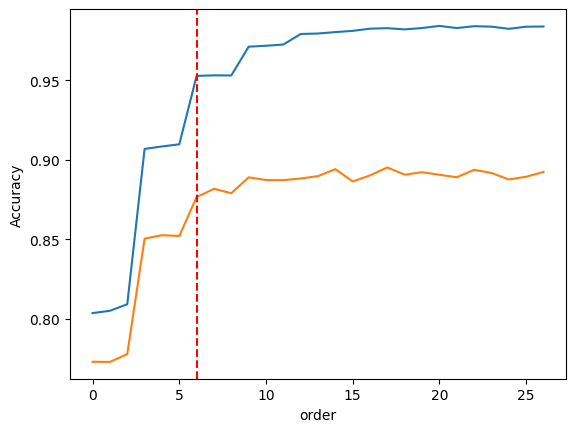

In [22]:
ans=pd.DataFrame(results.cv_results_)
ans['mean_train_score'].plot()
ans['mean_test_score'].plot()
plt.xlabel('order')
plt.ylabel('Accuracy')
plt.axvline(x=6,linestyle='--', color='r')
plt.show()


In [23]:
ans['params'][6]


{'max_depth': 7, 'n_estimators': 30}

In [24]:
rf.set_params(max_depth=7, n_estimators=30)
rf.fit(transformed_df, Ames.SalePrice)


,n_estimators,30
,criterion,'squared_error'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
model_importance = pd.Series(rf.feature_importances_, index=transformed_df.columns).sort_values(ascending=False)
model_importance.head(10)


OverallQual    0.595095
GrLivArea      0.144322
1stFlrSF       0.055952
TotalBsmtSF    0.041503
BsmtFinSF1     0.022746
GarageArea     0.022525
LotArea        0.009604
YearBuilt      0.009039
MasVnrArea     0.007644
2ndFlrSF       0.005950
dtype: float64

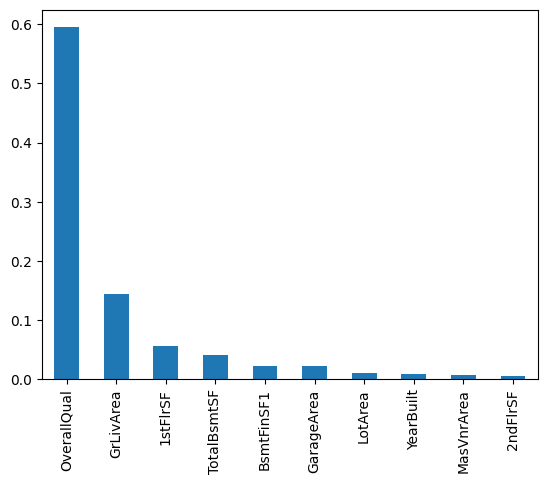

In [26]:
model_importance.head(10).plot(kind="bar")
plt.show()


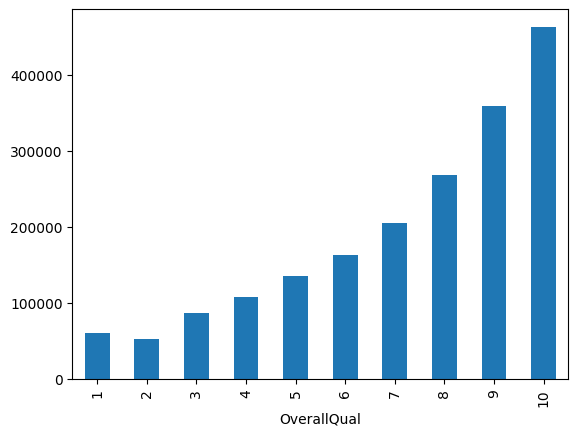

In [27]:
Ames.groupby(model_importance.index[0])['SalePrice'].mean().plot(kind="bar")
plt.show()


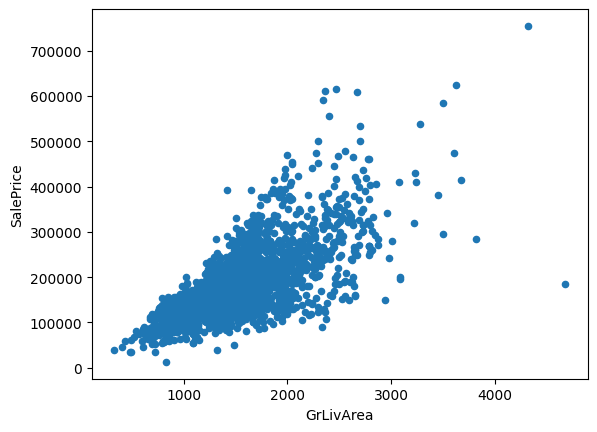

In [28]:
Ames[[model_importance.index[1], 'SalePrice']].plot(kind='scatter', x=model_importance.index[1], y='SalePrice')
plt.show()


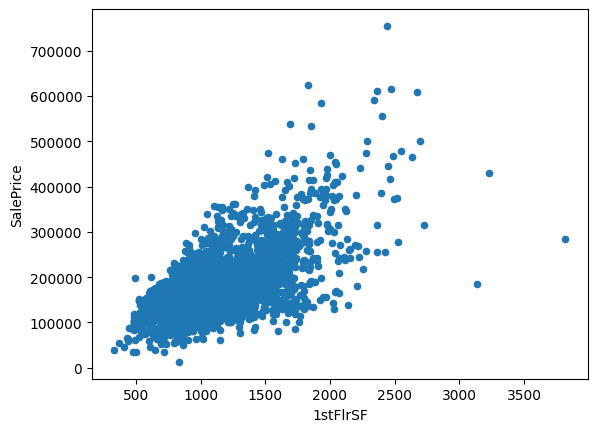

In [29]:
Ames[[model_importance.index[2], 'SalePrice']].plot(kind='scatter', x=model_importance.index[2], y='SalePrice')
plt.show()


In [ ]:
# scaler = StandardScaler()


In [30]:
X = transformed_df.copy()
# ---- 1. Define which numeric columns to log-transform ----
log_cols = [
    "LotArea", "LotFrontage", "MasVnrArea",
    "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF",
    "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea",
    "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal"
]
# Keep only columns that actually exist in X
log_cols = [c for c in log_cols if c in X.columns]
# ---- 2. Define full numeric scaling list ----
scale_features = [
    # Continuous
    "GrLivArea", "LotFrontage", "LotArea", "MasVnrArea",
    "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF",
    "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GarageArea",
    "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch",
    "ScreenPorch", "PoolArea", "MiscVal",
# Counts
    "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath",
    "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd",
    "Fireplaces", "GarageCars",
# Ordinal-as-numeric
    "OverallQual", "OverallCond",
# Year variables (or replace with "age")
    "YearBuilt", "YearRemodAdd", "GarageYrBlt"
]
scale_features = [c for c in scale_features if c in X.columns]
# ---- 3. Apply log transform first, then scale ----
X_num = X[scale_features].copy()
X_num[log_cols] = X_num[log_cols].apply(np.log1p)
scaler = StandardScaler()
X_scaled_num = pd.DataFrame(
    scaler.fit_transform(X_num),
    columns=scale_features,
    index=X.index
)
# ---- 4. Combine back with one-hot columns ----
onehot_cols = [c for c in X.columns if c not in scale_features]
X_final = pd.concat([X_scaled_num, X[onehot_cols]], axis=1)
target_scaled = np.log1p(Ames.SalePrice)


In [ ]:
# Descriptive statistics for numerical columns
print(X_final.describe())


In [ ]:
def univariate_linreg_statsmodels(
    X: pd.DataFrame,
    y: pd.Series,
    *,
    log_target: bool = False
) -> pd.DataFrame:
    """
    Runs separate OLS for each single feature vs. y.
    If log_target=True, fits on log1p(y) and reports RMSE in dollars (back-transformed).
    Coefficients and intercept are reported in the model's native space
    (log-price when log_target=True; raw dollars otherwise).
    """
    rows = []
    y_array = np.asarray(y)
    y_trainable = np.log1p(y_array) if log_target else y_array  # training target
for col in X.columns:
        x = X[[col]]
        if np.allclose(x.values.std(), 0):
            # constant feature: skip fit/metrics
            rows.append({
                "feature": col,
                "r2": np.nan,
                "rmse": np.nan,
                "coef": 0.0,
                "intercept": float(np.mean(y_trainable)),
                "p_value": np.nan,
                "coef_ci_low": np.nan,
                "coef_ci_high": np.nan,
                "fitted_on_log_target": bool(log_target)
            })
            continue
Xc = sm.add_constant(x, has_constant="add")
        model = sm.OLS(y_trainable, Xc).fit()
# Predictions in training space
        y_pred_train_space = model.predict(Xc)
# RMSE: report in dollars if we trained in log space
        if log_target:
            y_pred_dollars = np.expm1(y_pred_train_space)
            rmse = float(np.sqrt(((y_array - y_pred_dollars) ** 2).mean()))
        else:
            rmse = float(np.sqrt(((y_array - y_pred_train_space) ** 2).mean()))
coef = float(model.params[col])
        ci_low, ci_high = model.conf_int().loc[col].tolist()
        p = float(model.pvalues[col])
rows.append({
            "feature": col,
            "r2": float(model.rsquared),
            "rmse": rmse,
            "coef": coef,
            "intercept": float(model.params["const"]),
            "p_value": p,
            "coef_ci_low": float(ci_low),
            "coef_ci_high": float(ci_high),
            "fitted_on_log_target": bool(log_target)
        })
out = pd.DataFrame(rows).sort_values("r2", ascending=False).reset_index(drop=True)
    return out


In [ ]:
results_df = univariate_linreg_statsmodels(X_final, Ames.SalePrice, log_target=True)
results_df.head(10)


In [ ]:
Ames.groupby(results_df.feature[2])['SalePrice'].mean().plot(kind="bar")
plt.show()


In [ ]:
Ames.groupby(results_df.feature[3])['SalePrice'].mean().sort_values(ascending=False).plot(kind="bar")
plt.show()


In [ ]:
# --- Helpers ---
def rmse_compat(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)  # works across sklearn versions
    return float(np.sqrt(mse))
def get_feature_names(X):
    if hasattr(X, "columns"):
        return list(X.columns)
    return [f"x{i}" for i in range(X.shape[1])]
# --- Main ---
def fit_multiple_linreg_all_features(
    X, y, *, test_size=0.2, random_state=42, n_splits=5, log_target=False
):
    """
    X: preprocessed feature matrix (DataFrame or ndarray), no NaNs
    y: target Series/array (SalePrice)
    log_target: if True, fits on log1p(y) and reports back-transformed RMSE too
    """
    feature_names = get_feature_names(X)
# Target transform (optional)
    if log_target:
        y_trainable = np.log1p(y)
    else:
        y_trainable = np.asarray(y)
# Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_trainable, test_size=test_size, random_state=random_state
    )
# Fit
    lr = LinearRegression()
    lr.fit(X_train, y_train)
# Predict
    y_pred_test = lr.predict(X_test)
    y_pred_train = lr.predict(X_train)
# Metrics (in target space)
    if log_target:
        # Back-transform for error metrics in dollars
        y_test_dollars = np.expm1(y_test)
        y_pred_test_dollars = np.expm1(y_pred_test)
        test_rmse = rmse_compat(y_test_dollars, y_pred_test_dollars)
        test_r2 = r2_score(y_test_dollars, y_pred_test_dollars)
    else:
        test_rmse = rmse_compat(y_test, y_pred_test)
        test_r2 = float(r2_score(y_test, y_pred_test))
# Cross-validated RMSE (on full data)
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    neg_mse = cross_val_score(lr, X, y_trainable, scoring="neg_mean_squared_error", cv=cv)
    if log_target:
        # Back-transform each fold's MSE is not available; report in log space as approx
        cv_rmse = float(np.sqrt(-neg_mse).mean())
        cv_rmse_std = float(np.sqrt(-neg_mse).std())
    else:
        cv_rmse = float(np.sqrt(-neg_mse).mean())
        cv_rmse_std = float(np.sqrt(-neg_mse).std())
# Coefficients
    coef_df = pd.DataFrame({
        "feature": feature_names,
        "coef": lr.coef_,
        "abs_coef": np.abs(lr.coef_)
    }).sort_values("abs_coef", ascending=False).reset_index(drop=True)
metrics = {
        "test_rmse": test_rmse,
        "test_r2": test_r2,
        "cv_rmse_mean": cv_rmse,
        "cv_rmse_std": cv_rmse_std,
        "intercept": float(lr.intercept_),
        "fitted_on_log_target": bool(log_target),
    }
# Also return out-of-sample predictions (useful for residual checks)
    outputs = {
        "y_test_pred": y_pred_test if not log_target else y_pred_test_dollars,
        "y_test_true": y_test if not log_target else y_test_dollars,
    }
return lr, coef_df, metrics, outputs


In [ ]:
lr, coef_df, metrics, out = fit_multiple_linreg_all_features(X_final, Ames["SalePrice"], log_target=True)


In [ ]:
print(metrics)


In [ ]:
coef_df.head(20)


In [ ]:
residuals = pd.Series(out["y_test_true"] - out["y_test_pred"], name="residuals")


In [ ]:
def coef_to_pct_change(coef_df):
    df_pct = coef_df.copy()
    df_pct["pct_change"] = (np.exp(df_pct["coef"]) - 1) * 100
    return df_pct[["feature", "coef", "pct_change"]].sort_values(
        "pct_change", key=abs, ascending=False
    ).reset_index(drop=True)


In [ ]:
coef_pct_df = coef_to_pct_change(coef_df)


In [ ]:
# coef_pct_df must already have columns: ["feature", "coef", "pct_change"]
# X_final is your design matrix used to fit the model
def is_one_hot(col: pd.Series) -> bool:
    vals = pd.unique(col.dropna())
    # allow 0/1 in int or float form
    return set(np.asarray(vals)).issubset({0, 1, 0.0, 1.0})
# 1) Annotate feature type + counts/coverage
feature_types = {}
counts = {}
pct_of_data = {}
n = len(X_final)
for feat in coef_pct_df["feature"]:
    if feat in X_final.columns:
        if is_one_hot(X_final[feat]):
            feature_types[feat] = "one-hot categorical"
            counts[feat] = int(X_final[feat].sum())
            pct_of_data[feat] = (counts[feat] / n) * 100.0
        else:
            feature_types[feat] = "numeric"
            counts[feat] = None
            pct_of_data[feat] = 100.0  # numeric features apply to all rows
    else:
        feature_types[feat] = "unknown"
        counts[feat] = None
        pct_of_data[feat] = np.nan
coef_pct_df["feature_type"] = coef_pct_df["feature"].map(feature_types)
coef_pct_df["count"] = coef_pct_df["feature"].map(counts)
coef_pct_df["pct_of_data"] = coef_pct_df["feature"].map(pct_of_data)
def rarity_label(row):
    if row["feature_type"] == "numeric":
        return "Numeric (N/A)"
    if pd.isna(row["pct_of_data"]):
        return "N/A"
    if row["pct_of_data"] < 1:
        return "Very rare (<1%)"
    if row["pct_of_data"] < 5:
        return "Rare (1–5%)"
    return "Common (≥5%)"
coef_pct_df["rarity"] = coef_pct_df.apply(rarity_label, axis=1)
# Sort by absolute % change
coef_pct_df = coef_pct_df.sort_values("pct_change", key=np.abs, ascending=False).reset_index(drop=True)
# 2) Filter to "common": numeric OR ≥ 5% coverage
common_mask = (coef_pct_df["feature_type"] == "numeric") | (coef_pct_df["pct_of_data"] >= 5)
common_coef_df = (
    coef_pct_df.loc[common_mask, ["feature", "feature_type", "pct_change", "count", "pct_of_data", "rarity"]]
    .sort_values("pct_change", key=np.abs, ascending=False)
    .reset_index(drop=True)
)
print("=== FULL LIST WITH RARITY ===")
display(coef_pct_df[["feature", "feature_type", "pct_change", "count", "pct_of_data", "rarity"]])
print("\n=== COMMON FEATURES (numeric OR ≥5% one-hot) ===")
display(common_coef_df)


In [ ]:
common_coef_df['pct_change_abs'] = abs(common_coef_df['pct_change'])


In [ ]:
common_coef_df.sort_values('pct_change_abs', ascending = False).head()


In [ ]:
ridge = Ridge()
lasso = Lasso()


In [ ]:
ridge.fit(X_final, np.log1p(Ames.SalePrice))
print('the ridge intercept is: %.2f' %(ridge.intercept_))
pd.Series(ridge.coef_, index=X_final.columns)


In [ ]:
ridge.score(X_final,np.log1p(Ames.SalePrice))


In [ ]:
lasso.fit(X_final, np.log1p(Ames.SalePrice))
print('the lasso intercept is: %.2f' %(lasso.intercept_))
pd.Series(lasso.coef_, index=X_final.columns)


In [ ]:
lasso.score(X_final, np.log1p(Ames.SalePrice))


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_final,np.log1p(Ames.SalePrice),test_size=0.2)


In [ ]:
ridge_scores_train = []
lasso_scores_train = []
ridge_scores_test  = []
lasso_scores_test  = []
alphas = np.linspace(0.01, 1, 100)
for alpha in alphas:
            ridge.set_params(alpha=alpha)
            lasso.set_params(alpha=alpha)
            ridge.fit(X_train, Y_train)
            lasso.fit(X_train, Y_train)
            ridge_scores_train.append(ridge.score(X_train, Y_train))
            ridge_scores_test.append(ridge.score(X_test, Y_test))
            lasso_scores_train.append(lasso.score(X_train, Y_train))
            lasso_scores_test.append(lasso.score(X_test, Y_test))
ridge_scores_train = np.array(ridge_scores_train)
ridge_scores_test  = np.array(ridge_scores_test)
lasso_scores_train = np.array(lasso_scores_train)
lasso_scores_test  = np.array(lasso_scores_test)


In [ ]:
plt.plot(alphas, ridge_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, ridge_scores_test, label=r'$test\ R^2$')
plt.legend(loc=1)
plt.title(r'Ridge Train-Test $R^2$ Comparison')
ridge_underfit = ridge_scores_train < ridge_scores_test
# last_underfit  = np.max(alphas[ridge_underfit])
# plt.axvline(last_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')
plt.show()


In [ ]:
# Example: ridge with CV over alphas
alphas = [0.01, 0.1, 1, 10, 50, 100, 200]
ridge = RidgeCV(alphas=alphas, cv=KFold(10, shuffle=True, random_state=42), scoring="neg_root_mean_squared_error")
ridge.fit(X_final, np.log1p(Ames["SalePrice"]))
print("Best alpha:", ridge.alpha_)
print("RMSE (log target):", -ridge.best_score_)


In [ ]:
def evaluate_penalized_models_stable(
    X, y, *,
    log_target=True,
    random_state=42,
    top_n=50,            # collect up to top_n by |coef| before filtering/sorting
    min_pct=5.0,         # keep one-hot features seen in ≥ min_pct of homes
    include_full=False   # also return unfiltered coef tables
):
    """
    Fits Ridge, Lasso, ElasticNet with CV, returns metrics and filtered coef tables
    with % changes, feature types, and coverage. Keeps all numeric features and
    one-hot features present in ≥ min_pct of homes.
    """
    y_array = np.asarray(y)
    y_trainable = np.log1p(y_array) if log_target else y_array
# --- CV and search grids ---
    cv = KFold(n_splits=10, shuffle=True, random_state=random_state)
    alphas = np.logspace(-3, 3, 50)
    l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]
# --- Fit models ---
    ridge = RidgeCV(alphas=alphas, cv=cv, scoring="neg_mean_squared_error").fit(X, y_trainable)
    lasso = LassoCV(alphas=alphas, cv=cv, random_state=random_state, max_iter=5000).fit(X, y_trainable)
    enet  = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=cv,
                         random_state=random_state, max_iter=5000).fit(X, y_trainable)
# --- Metrics helper ---
    def _metrics(name, model, y_true, y_pred_train_space):
        if log_target:
            y_pred = np.expm1(y_pred_train_space)
            rmse = float(np.sqrt(mean_squared_error(y_true, y_pred)))
            r2   = float(r2_score(y_true, y_pred))
        else:
            rmse = float(np.sqrt(mean_squared_error(y_true, y_pred_train_space)))
            r2   = float(r2_score(y_true, y_pred_train_space))
        return {
            "model": name,
            "alpha": getattr(model, "alpha_", None),
            "l1_ratio": getattr(model, "l1_ratio_", None),
            "rmse": rmse,
            "r2": r2
        }
results = pd.DataFrame([
        _metrics("Ridge",      ridge, y_array, ridge.predict(X)),
        _metrics("Lasso",      lasso, y_array, lasso.predict(X)),
        _metrics("ElasticNet", enet,  y_array, enet.predict(X)),
    ])
# --- Build coef tables ---
    def _coef_table(model, name):
        if hasattr(X, "columns"):
            feats = list(X.columns)
        else:
            feats = [f"x{i}" for i in range(X.shape[1])]
        coef = np.asarray(model.coef_)
        df = pd.DataFrame({"feature": feats, "coef": coef})
        df["abs_coef"] = df["coef"].abs()
        df = df.sort_values("abs_coef", ascending=False).head(top_n).reset_index(drop=True)
        return df
raw_tables = {
        "Ridge": _coef_table(ridge, "Ridge"),
        "Lasso": _coef_table(lasso, "Lasso"),
        "ElasticNet": _coef_table(enet, "ElasticNet"),
    }
# --- Add % change, feature type, and coverage; then filter ---
    def _is_one_hot(col: pd.Series) -> bool:
        vals = pd.unique(col.dropna())
        return set(np.asarray(vals)).issubset({0, 1, 0.0, 1.0})
n = len(X) if hasattr(X, "__len__") else np.nan
    if hasattr(X, "columns"):
        # detect once
        is_dummy = {c: _is_one_hot(X[c]) for c in X.columns}
        coverage = {c: (float(X[c].sum()) / n * 100.0) if is_dummy[c] else 100.0 for c in X.columns}
    else:
        is_dummy, coverage = {}, {}
def _augment_and_filter(df):
        out = df.copy()
        # % change (only meaningful if log_target=True)
        out["pct_change"] = (np.exp(out["coef"]) - 1.0) * 100.0 if log_target else np.nan
        # feature type & coverage
        if hasattr(X, "columns"):
            out["feature_type"] = out["feature"].map(lambda f: "one-hot categorical" if is_dummy.get(f, False) else "numeric")
            out["pct_of_data"]  = out["feature"].map(lambda f: coverage.get(f, np.nan))
        else:
            out["feature_type"] = "unknown"
            out["pct_of_data"] = np.nan
        # filter: keep all numeric OR one-hot with ≥ min_pct coverage
        mask = (out["feature_type"] == "numeric") | (out["pct_of_data"] >= min_pct)
        out = out[mask].copy()
        # sort by abs % change (fallback to abs coef if not logged)
        if log_target:
            out = out.reindex(out["pct_change"].abs().sort_values(ascending=False).index)
        else:
            out = out.sort_values("abs_coef", ascending=False)
        out.reset_index(drop=True, inplace=True)
        return out
filtered_tables = {name: _augment_and_filter(df) for name, df in raw_tables.items()}
return results, filtered_tables if not include_full else (results, filtered_tables, raw_tables)


In [ ]:
# log target recommended for Ames
results_df, coef_tables = evaluate_penalized_models_stable(
    X_final, Ames["SalePrice"], log_target=True, min_pct=5, top_n=200
)


In [ ]:
print(results_df)
print("\nRidge (common):\n", coef_tables["Ridge"][["feature","feature_type","pct_change","pct_of_data"]].head(15))
print("\nLasso (common):\n", coef_tables["Lasso"][["feature","feature_type","pct_change","pct_of_data"]].head(15))
print("\nElasticNet (common):\n", coef_tables["ElasticNet"][["feature","feature_type","pct_change","pct_of_data"]].head(15))


In [ ]:
alphas = np.logspace(-3, 1, 40)  # widen if needed
l1_grid = [0.1, 0.3, 0.5, 0.7, 0.9]
models = [
    ("Ridge", Ridge(alpha=14.56)),  # keep fixed if you like
    ("LassoCV", LassoCV(alphas=alphas, cv=5, max_iter=100_000, tol=1e-3, n_jobs=-1)),
    ("ElasticNetCV", ElasticNetCV(alphas=alphas, l1_ratio=l1_grid, cv=5, max_iter=100_000, tol=1e-3, n_jobs=-1)),
    ("RandomForest", RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1)),
    ("HistGB", HistGradientBoostingRegressor(random_state=42)),
    ("SVR", SVR(kernel='rbf', C=10, epsilon=0.2)),
]


In [ ]:
# ---------- 1) Build consensus table ----------
def build_consensus_table(ridge_df: pd.DataFrame,
                          lasso_df: pd.DataFrame,
                          enet_df: pd.DataFrame,
                          min_models: int = 2) -> pd.DataFrame:
    """
    Merge Ridge/Lasso/ElasticNet common-tables, compute average % change and std.
    Keeps features that appear in at least `min_models` of the three tables.
    """
    # Keep only needed cols and rename pct_change to model-specific names
    def _prep(df, model_name):
        return (df[["feature", "feature_type", "pct_change", "pct_of_data"]]
                  .rename(columns={"pct_change": f"{model_name}_pct",
                                   "pct_of_data": f"{model_name}_pct_of_data"}))
r = _prep(ridge_df.copy(), "Ridge")
    l = _prep(lasso_df.copy(), "Lasso")
    e = _prep(enet_df.copy(),  "ElasticNet")
# Outer-join on feature + type
    merged = r.merge(l, on=["feature", "feature_type"], how="outer") \
              .merge(e, on=["feature", "feature_type"], how="outer")
# Count how many models have a pct value
    model_cols = ["Ridge_pct", "Lasso_pct", "ElasticNet_pct"]
    merged["n_models"] = merged[model_cols].notna().sum(axis=1)
# Keep features present in at least `min_models`
    merged = merged[merged["n_models"] >= min_models].copy()
# Avg / std across available models
    merged["avg_pct_change"] = merged[model_cols].mean(axis=1, skipna=True)
    merged["std_pct_change"] = merged[model_cols].std(axis=1, ddof=0, skipna=True)
# Optional: a single coverage column (max across models; they should be similar)
    coverage_cols = ["Ridge_pct_of_data", "Lasso_pct_of_data", "ElasticNet_pct_of_data"]
    if any(c in merged.columns for c in coverage_cols):
        merged["pct_of_data"] = merged[coverage_cols].max(axis=1, skipna=True)
# Order by absolute average effect
    merged = (merged
              .sort_values("avg_pct_change", key=lambda s: s.abs(), ascending=False)
              .reset_index(drop=True))
return merged
# ---------- 2) Plot consensus bar chart ----------
def plot_consensus_bar(consensus_df: pd.DataFrame,
                       top_n: int = 15,
                       with_errorbars: bool = True,
                       figsize=(9, 6),
                       title="Consensus Feature Importance (Penalized Models)"):
    """
    Horizontal bar chart of average % change (per 1 SD for numeric, vs baseline for dummies).
    """
    df = consensus_df.head(top_n).copy()
    df = df.sort_values("avg_pct_change", ascending=True)
plt.figure(figsize=figsize)
    bars = plt.barh(df["feature"], df["avg_pct_change"])
# Color by sign (optional; remove if you prefer default)
    for b, val in zip(bars, df["avg_pct_change"]):
        b.set_color("tab:red" if val < 0 else "tab:green")
if with_errorbars and "std_pct_change" in df.columns:
        # Draw error bars manually (centered at bar ends)
        x = df["avg_pct_change"].values
        err = df["std_pct_change"].fillna(0).values
        y_positions = np.arange(len(df))
        plt.errorbar(x, y_positions, xerr=err, fmt="none", ecolor="gray", capsize=3, linewidth=1)
plt.axvline(0, linewidth=0.8, color="black")
    plt.xlabel("Average % Change in Price (per 1 SD or category)")
    plt.ylabel("Feature")
    plt.title(title)
    plt.tight_layout()
    plt.show()


In [ ]:
ridge_df = coef_tables["Ridge"]
lasso_df = coef_tables["Lasso"]
enet_df  = coef_tables["ElasticNet"]
# Build consensus
consensus = build_consensus_table(ridge_df, lasso_df, enet_df, min_models=2)
# See the table
display(consensus[["feature", "feature_type", "avg_pct_change", "std_pct_change", "pct_of_data"]].head(20))
# Plot
plot_consensus_bar(consensus, top_n=15, with_errorbars=True)


In [ ]:
y_final = Ames.SalePrice


In [ ]:
rf = RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1)
scores = cross_val_score(rf, X_final, y_final, scoring="neg_root_mean_squared_error", cv=5)
print(f"CV RMSE: {-scores.mean():.2f} ± {scores.std():.2f}")


In [ ]:
alphas = np.logspace(-3, 1, 40)  # widen if needed
l1_grid = [0.1, 0.3, 0.5, 0.7, 0.9]
models = [
    ("Ridge", Ridge(alpha=14.56)),  # keep fixed if you like
    ("LassoCV", LassoCV(alphas=alphas, cv=5, max_iter=100_000, tol=1e-3, n_jobs=-1)),
    ("ElasticNetCV", ElasticNetCV(alphas=alphas, l1_ratio=l1_grid, cv=5, max_iter=100_000, tol=1e-3, n_jobs=-1)),
    ("RandomForest", RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1)),
    ("HistGB", HistGradientBoostingRegressor(random_state=42)),
    ("SVR", SVR(kernel='rbf', C=10, epsilon=0.2)),
]


In [ ]:
def rmse(y_true, y_pred):
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))
def cv_eval_models(X, y, models, *, cv=5, log_target=False, random_state=42):
    """
    Cross-validated evaluation with optional log-target training and dollar-scale metrics.
Returns a DataFrame with:
      - cv_rmse_mean / cv_rmse_std  (in $)
      - r2_cv   (R² on out-of-fold predictions, in $ space)
      - r2_full (R² when fitting the model on all data, in $ space)
    """
    # Ensure numpy views for y when needed
    if hasattr(y, "to_numpy"):
        y_np = y.to_numpy()
    else:
        y_np = np.asarray(y)
# For X, keep as-is (can be DataFrame or ndarray); we'll iloc if available
    kf = KFold(n_splits=cv, shuffle=True, random_state=random_state)
results = []
    for name, model in models:
        fold_rmses = []
        oof_pred = np.zeros(len(y_np), dtype=float)
for train_idx, val_idx in kf.split(X):
            # X positional split
            if hasattr(X, "iloc"):
                X_tr, X_va = X.iloc[train_idx], X.iloc[val_idx]
            else:
                X_tr, X_va = X[train_idx], X[val_idx]
# y positional split (always numpy)
            y_tr, y_va = y_np[train_idx], y_np[val_idx]
# Train on raw or log target
            y_tr_used = np.log1p(y_tr) if log_target else y_tr
            model.fit(X_tr, y_tr_used)
# Predict and back-transform if needed
            y_va_pred = model.predict(X_va)
            if log_target:
                y_va_pred = np.expm1(y_va_pred)
# Fold metrics (dollar space)
            fold_rmses.append(rmse(y_va, y_va_pred))
            oof_pred[val_idx] = y_va_pred
# Overall CV metrics (OOF predictions in dollar space)
        r2_cv = r2_score(y_np, oof_pred)
# Fit on full data for full-data R² (still in dollar space)
        y_full_used = np.log1p(y_np) if log_target else y_np
        if hasattr(X, "iloc"):
            model.fit(X, y_full_used)
            y_full_pred = model.predict(X)
        else:
            model.fit(X, y_full_used)
            y_full_pred = model.predict(X)
        if log_target:
            y_full_pred = np.expm1(y_full_pred)
        r2_full = r2_score(y_np, y_full_pred)
results.append({
            "model": name,
            "cv_rmse_mean": float(np.mean(fold_rmses)),
            "cv_rmse_std":  float(np.std(fold_rmses, ddof=0)),
            "r2_cv":  float(r2_cv),
            "r2_full": float(r2_full),
        })
return pd.DataFrame(results).sort_values("cv_rmse_mean").reset_index(drop=True)


In [ ]:
# RAW target
results_raw = cv_eval_models(X_final, y_final, models, cv=5, log_target=False, random_state=42)
print("\n=== RAW target leaderboard ===")
print(results_raw.to_string(index=False))
# LOG target (RMSE back-transformed to dollars)
results_log = cv_eval_models(X_final, y_final, models, cv=5, log_target=True, random_state=42)
print("\n=== LOG target leaderboard ===")
print(results_log.to_string(index=False))


In [ ]:
# ---------- helpers ----------
def rmse(y_true, y_pred):
    # version-proof RMSE (no squared=False)
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))
def evaluate_model(model, X, y, *, log_target=False, cv=5, random_state=42, n_jobs_cv=1, backend="threading"):
    y_np = y.to_numpy() if hasattr(y, "to_numpy") else np.asarray(y)
    splitter = KFold(n_splits=cv, shuffle=True, random_state=random_state)
    y_used = np.log1p(y_np) if log_target else y_np
# threads avoid the multiprocessing resource_tracker
    with parallel_backend(backend):
        y_pred = cross_val_predict(model, X, y_used, cv=splitter, n_jobs=n_jobs_cv)
if log_target:
        y_pred = np.expm1(y_pred)
    return rmse(y_np, y_pred), r2_score(y_np, y_pred)
# ---------- models ----------
# models = [
#     ("Ridge", Ridge(alpha=14.56)),
#     ("Lasso", Lasso(alpha=0.001)),
#     ("ElasticNet", ElasticNet(alpha=0.0013, l1_ratio=0.1)),
#     ("RandomForest", RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1)),
#     ("HistGB", HistGradientBoostingRegressor(random_state=42)),
#     ("SVR", SVR(kernel='rbf', C=10, epsilon=0.2))
# ]
# ---------- evaluate (raw + log) ----------
results = []
for log_opt in [False, True]:
    target_name = "log" if log_opt else "raw"
    for name, model in models:
        rmse_val, r2_val = evaluate_model(model, X_final, y_final, log_target=log_opt, cv=5, random_state=42)
        results.append({"target": target_name, "model": name, "cv_rmse_mean": rmse_val, "r2": r2_val})
results_df = pd.DataFrame(results)
print(results_df.sort_values(["target", "cv_rmse_mean"]).to_string(index=False))
# ---------- prepare pivots ----------
rmse_pivot = results_df.pivot(index="model", columns="target", values="cv_rmse_mean")
r2_pivot   = results_df.pivot(index="model", columns="target", values="r2")
# Ensure both columns exist even if something failed earlier
for col in ["raw", "log"]:
    if col not in rmse_pivot.columns:
        rmse_pivot[col] = np.nan
    if col not in r2_pivot.columns:
        r2_pivot[col] = np.nan
# ---------- combined figure ----------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
ax_rmse, ax_r2 = axes
# ----- Left: RMSE bars -----
x = np.arange(len(rmse_pivot.index))
width = 0.35
ax_rmse.bar(x - width/2, rmse_pivot["raw"].values, width, label="Raw")
ax_rmse.bar(x + width/2, rmse_pivot["log"].values, width, label="Log")
ax_rmse.set_ylabel("Cross-Validated RMSE ($)")
ax_rmse.set_title("RMSE: Raw vs. Log Target")
ax_rmse.set_xticks(x)
ax_rmse.set_xticklabels(rmse_pivot.index, rotation=45, ha="right")
ax_rmse.grid(axis="y", linestyle="--", alpha=0.7)
ax_rmse.legend()
# Improvement labels above taller bar
for i, model in enumerate(rmse_pivot.index):
    raw_val = rmse_pivot.loc[model, "raw"]
    log_val = rmse_pivot.loc[model, "log"]
    if np.isfinite(raw_val) and np.isfinite(log_val):
        improvement = (raw_val - log_val) / raw_val * 100.0
        y_top = max(raw_val, log_val)
        ax_rmse.text(i, y_top * 1.02, f"{improvement:+.1f}%", ha="center", va="bottom", fontsize=9, fontweight="bold")
# ----- Right: R² bars -----
ax_r2.bar(x - width/2, r2_pivot["raw"].values, width, label="Raw")
ax_r2.bar(x + width/2, r2_pivot["log"].values, width, label="Log")
ax_r2.set_ylabel("Cross-Validated R²")
ax_r2.set_title("R²: Raw vs. Log Target")
ax_r2.set_xticks(x)
ax_r2.set_xticklabels(r2_pivot.index, rotation=45, ha="right")
ax_r2.grid(axis="y", linestyle="--", alpha=0.7)
ax_r2.legend()
# ΔR² labels above taller bar
for i, model in enumerate(r2_pivot.index):
    r2_raw = r2_pivot.loc[model, "raw"]
    r2_log = r2_pivot.loc[model, "log"]
    if np.isfinite(r2_raw) and np.isfinite(r2_log):
        delta = r2_log - r2_raw
        y_top = max(r2_raw, r2_log)
        ax_r2.text(i, y_top * 1.02, f"{delta:+.3f} ΔR²", ha="center", va="bottom", fontsize=9, fontweight="bold")
plt.suptitle("Model Performance Comparison (Ames)", y=1.02, fontsize=13)
plt.tight_layout()
plt.show()


In [ ]:
# ---------- helpers ----------
def rmse(y_true, y_pred):
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))
def cv_eval_models_nonlinear(
    X_raw, y, *,
    cv=5,
    log_target=False,
    random_state=42,
    models=None
):
    """
    Cross-validated evaluation for NON-LINEAR (tree-based) models on RAW (unscaled) features.
    Works with one-hot encoded categoricals; do NOT standardize numeric features.
Returns a DataFrame with:
      - cv_rmse_mean / cv_rmse_std  (in $)
      - r2_cv   (R² on out-of-fold predictions, in $ space)
      - r2_full (R² when fitting on all data, in $ space)
    """
    # Default model set (all non-linear, no scaling needed)
    if models is None:
        models = [
            ("HistGB",       HistGradientBoostingRegressor(random_state=random_state)),
            ("RandomForest", RandomForestRegressor(n_estimators=800, random_state=random_state, n_jobs=-1)),
            ("ExtraTrees",   ExtraTreesRegressor(n_estimators=800, random_state=random_state, n_jobs=-1)),
            ("GradBoost",    GradientBoostingRegressor(random_state=random_state)),
        ]
# y as numpy for robust positional indexing
    y_np = y.to_numpy() if hasattr(y, "to_numpy") else np.asarray(y)
kf = KFold(n_splits=cv, shuffle=True, random_state=random_state)
    results = []
for name, model in models:
        fold_rmses = []
        oof_pred = np.zeros(len(y_np), dtype=float)
for tr_idx, va_idx in kf.split(X_raw):
            # positional split for X
            if hasattr(X_raw, "iloc"):
                X_tr, X_va = X_raw.iloc[tr_idx], X_raw.iloc[va_idx]
            else:
                X_tr, X_va = X_raw[tr_idx], X_raw[va_idx]
# positional split for y
            y_tr, y_va = y_np[tr_idx], y_np[va_idx]
# train on raw or log target
            y_tr_used = np.log1p(y_tr) if log_target else y_tr
            model.fit(X_tr, y_tr_used)
# predict; back-transform if needed
            y_va_pred = model.predict(X_va)
            if log_target:
                y_va_pred = np.expm1(y_va_pred)
# accumulate fold metrics in $ space
            fold_rmses.append(rmse(y_va, y_va_pred))
            oof_pred[va_idx] = y_va_pred
# CV metrics from OOF preds (dollar space)
        r2_cv = r2_score(y_np, oof_pred)
# Full-data fit (dollar space)
        y_full_used = np.log1p(y_np) if log_target else y_np
        model.fit(X_raw, y_full_used)
        y_full_pred = model.predict(X_raw)
        if log_target:
            y_full_pred = np.expm1(y_full_pred)
        r2_full = r2_score(y_np, y_full_pred)
results.append({
            "model": name,
            "cv_rmse_mean": float(np.mean(fold_rmses)),
            "cv_rmse_std":  float(np.std(fold_rmses, ddof=0)),
            "r2_cv":  float(r2_cv),
            "r2_full": float(r2_full),
        })
return pd.DataFrame(results).sort_values("cv_rmse_mean").reset_index(drop=True)


In [ ]:
# Use your *raw, unscaled* feature matrix (keep OHE; just skip StandardScaler on numerics)
# If you only have X_final (scaled), rebuild X_raw by skipping the scaler step in your pipeline.
X_raw = transformed_df
results_raw = cv_eval_models_nonlinear(X_raw, y_final, cv=5, log_target=False, random_state=42)
print("\n=== Non-linear models on RAW target (raw features) ===")
print(results_raw.to_string(index=False))
results_log = cv_eval_models_nonlinear(X_raw, y_final, cv=5, log_target=True, random_state=42)
print("\n=== Non-linear models on LOG target (raw features) ===")
print(results_log.to_string(index=False))
